In [51]:
using Oceananigans
using Oceananigans.Operators
using JLD2
using CairoMakie
using ImageFiltering: Kernel.gaussian, imfilter
using OffsetArrays: no_offset_view

In [18]:
foldername = "../../scratch/Project/front-init-large"

"../../scratch/Project/front-init-large"

In [94]:
@inline get_fields(field_names, filename, iteration) = jldopen(filename) do file
    NamedTuple(map(enumerate(field_names)) do (i, field_name)
        field = imfilter(file["$field_name/$iteration"][:, 1, :], gaussian((5, 1)))
        Pair(Symbol(field_name), field)
    end)
end

get_fields (generic function with 1 method)

In [20]:
u_balance_names = ("uu_xᶠⁿᶜ", "wu_zᶠⁿᶜ", "u′u′_xᶠⁿᶜ", "w′u′_zᶠⁿᶜ", "fvᶠⁿᶜ",  "φ_xᶠⁿᶜ")
v_balance_names = ("uv_xᶜⁿᶜ", "wv_zᶜⁿᶜ", "u′v′_xᶜⁿᶜ", "w′v′_zᶜⁿᶜ", "fuᶜⁿᶜ")
w_balance_names = ("uw_xᶜⁿᶠ", "ww_zᶜⁿᶠ", "u′w′_xᶜⁿᶠ", "w′w′_zᶜⁿᶠ", "bᶜⁿᶠ", "φ_zᶜⁿᶠ")
b_balance_names = ("ub_xᶜⁿᶜ", "wb_zᶜⁿᶜ", "u′b′_xᶜⁿᶜ", "w′b′_zᶜⁿᶜ")

("ub_xᶜⁿᶜ", "wb_zᶜⁿᶜ", "u′b′_xᶜⁿᶜ", "w′b′_zᶜⁿᶜ")

In [95]:
iterations, ts, xsᶠᵃᵃ, xsᶜᵃᵃ, zsᵃᵃᶠ, zsᵃᵃᶜ = jldopen("$foldername/balance.jld2") do file
    iterations = keys(file["t"])
    ts = [file["t/$iteration"] for iteration in iterations]
    iterations, ts, no_offset_view(file["grid/xᶠᵃᵃ"]), no_offset_view(file["grid/xᶜᵃᵃ"]), no_offset_view(file["grid/zᵃᵃᶠ"]), no_offset_view(file["grid/zᵃᵃᶜ"])
    end;

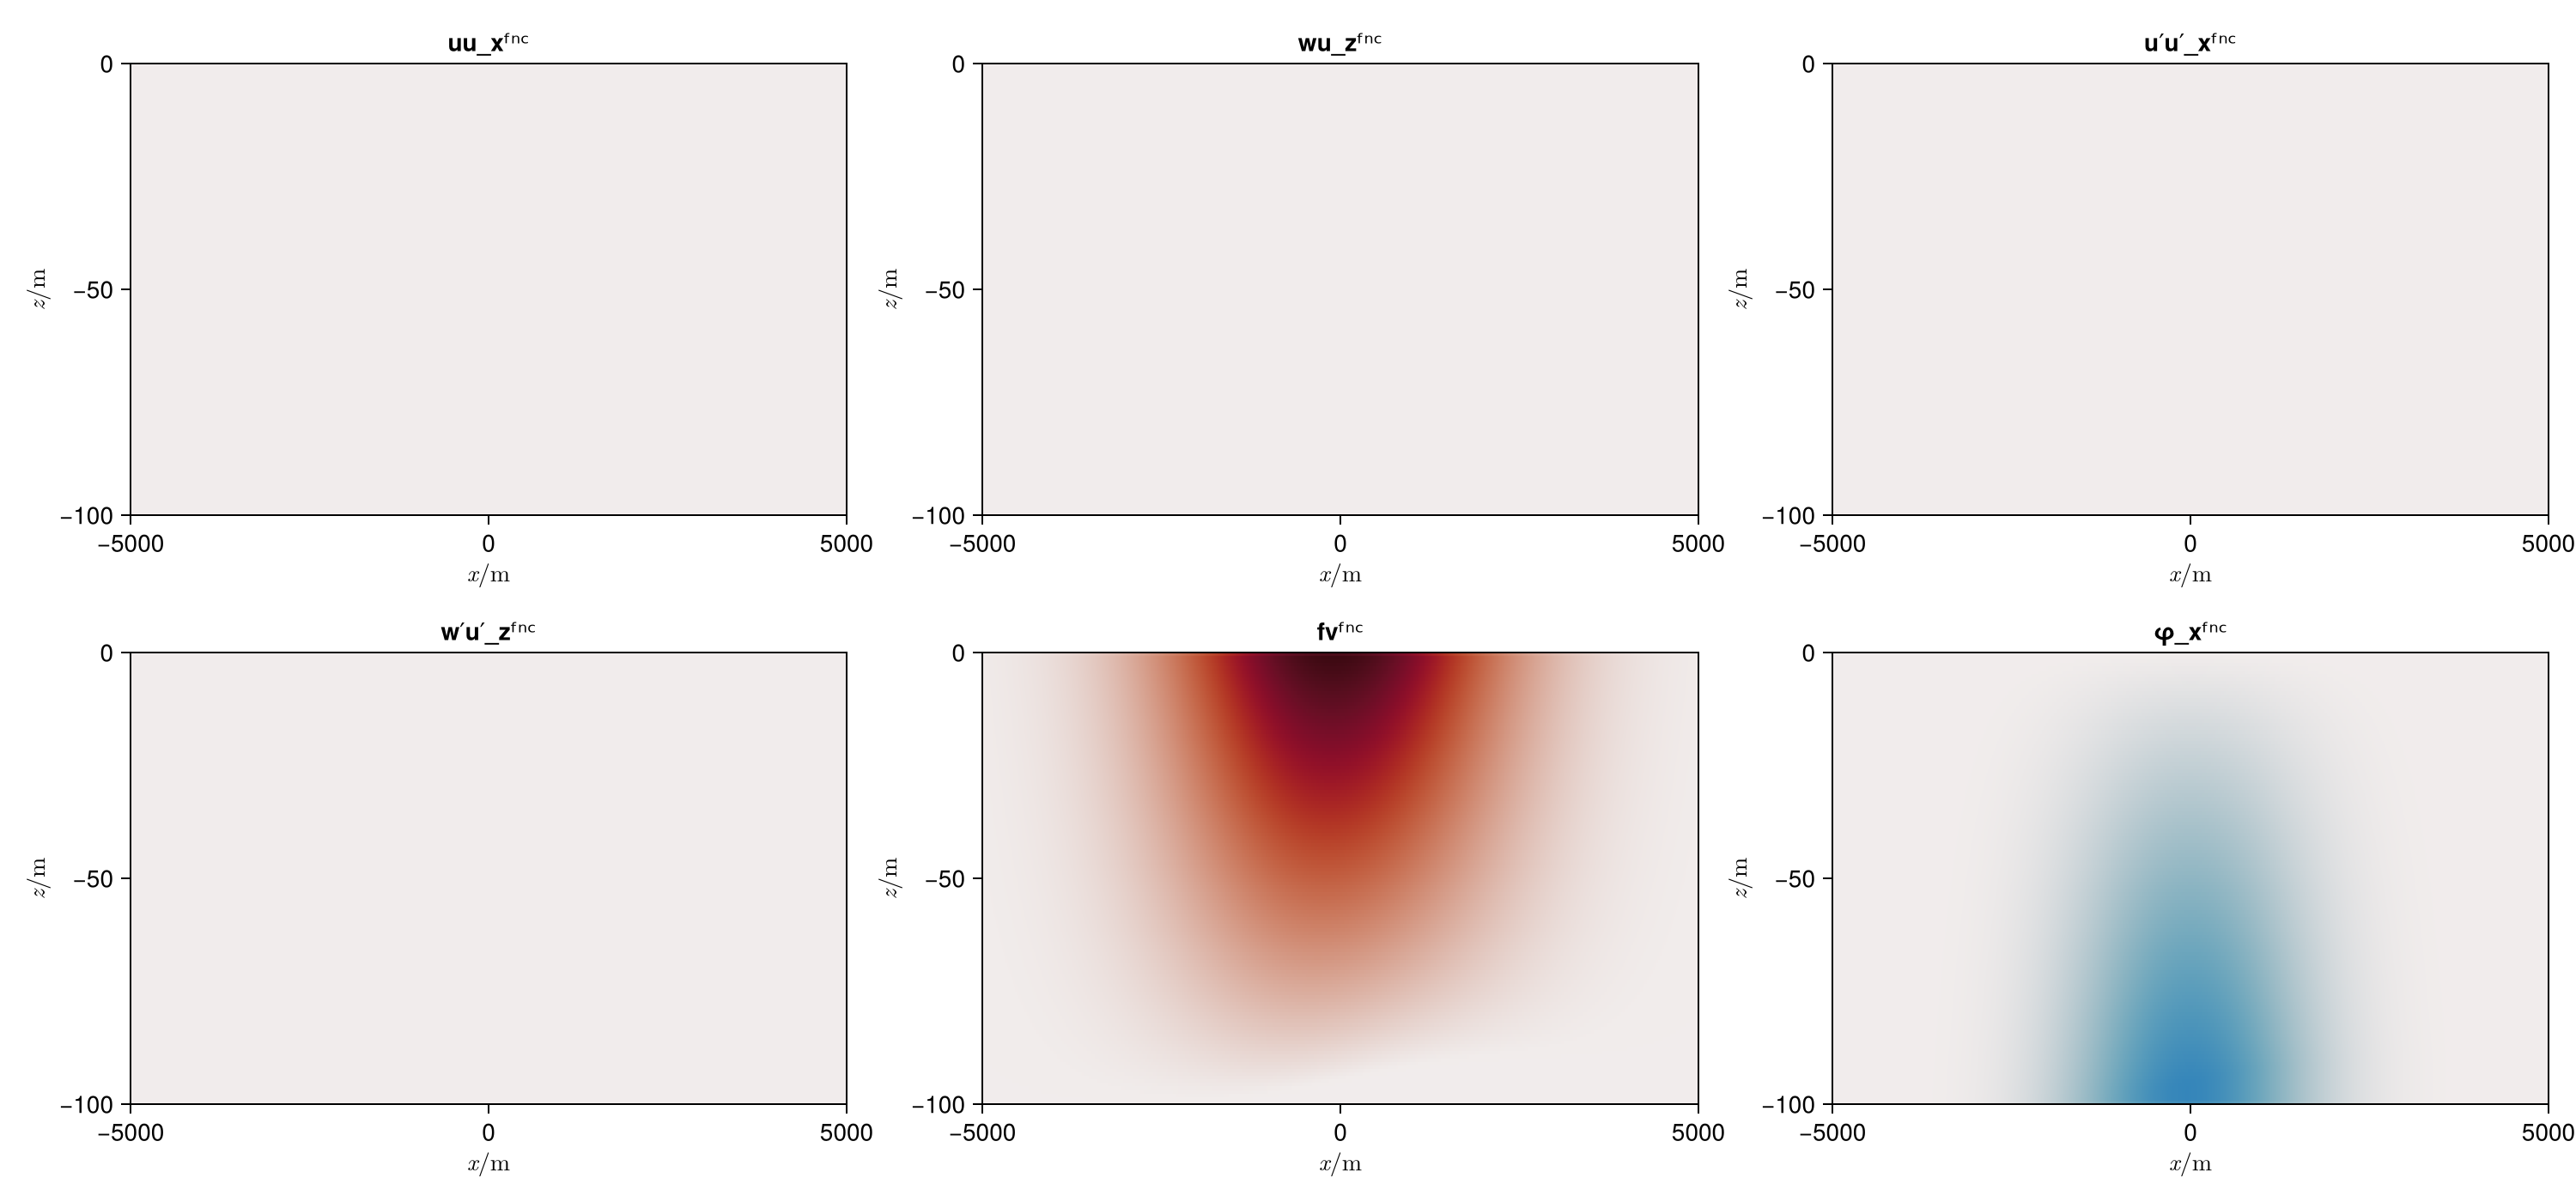

In [140]:
u_balance_fields = get_fields(u_balance_names, "$foldername/balance.jld2", iterations[1]);
fig = Figure(; size=(1500, 700))
axis_kwargs = (; xlabel=L"x/\text{m}", ylabel=L"z/\text{m}", limits=(xsᶠᵃᵃ[4], xsᶠᵃᵃ[end-3], zsᵃᵃᶠ[4], zsᵃᵃᶠ[end-3]))

u_b_max = maximum(map(a->maximum(abs.(a)), u_balance_fields)) / 1
ht_kwargs = (; colormap=:balance, colorrange=(-u_b_max, u_b_max))
ax = Axis(fig[1, 1]; title=u_balance_names[1], axis_kwargs...)
heatmap!(ax, xsᶠᵃᵃ, zsᵃᵃᶜ, u_balance_fields[1]; ht_kwargs...)

ax = Axis(fig[1, 2]; title=u_balance_names[2], axis_kwargs...)
heatmap!(ax, xsᶠᵃᵃ, zsᵃᵃᶜ, u_balance_fields[2]; ht_kwargs...)

ax = Axis(fig[1, 3]; title=u_balance_names[3], axis_kwargs...)
heatmap!(ax, xsᶠᵃᵃ, zsᵃᵃᶜ, u_balance_fields[3]; ht_kwargs...)

ax = Axis(fig[2, 1]; title=u_balance_names[4], axis_kwargs...)
heatmap!(ax, xsᶠᵃᵃ, zsᵃᵃᶜ, u_balance_fields[4]; ht_kwargs...)

ax = Axis(fig[2, 2]; title=u_balance_names[5], axis_kwargs...)
heatmap!(ax, xsᶠᵃᵃ, zsᵃᵃᶜ, u_balance_fields[5]; ht_kwargs...)

ax = Axis(fig[2, 3]; title=u_balance_names[6], axis_kwargs...)
heatmap!(ax, xsᶠᵃᵃ, zsᵃᵃᶜ, u_balance_fields[6]; ht_kwargs...)
fig

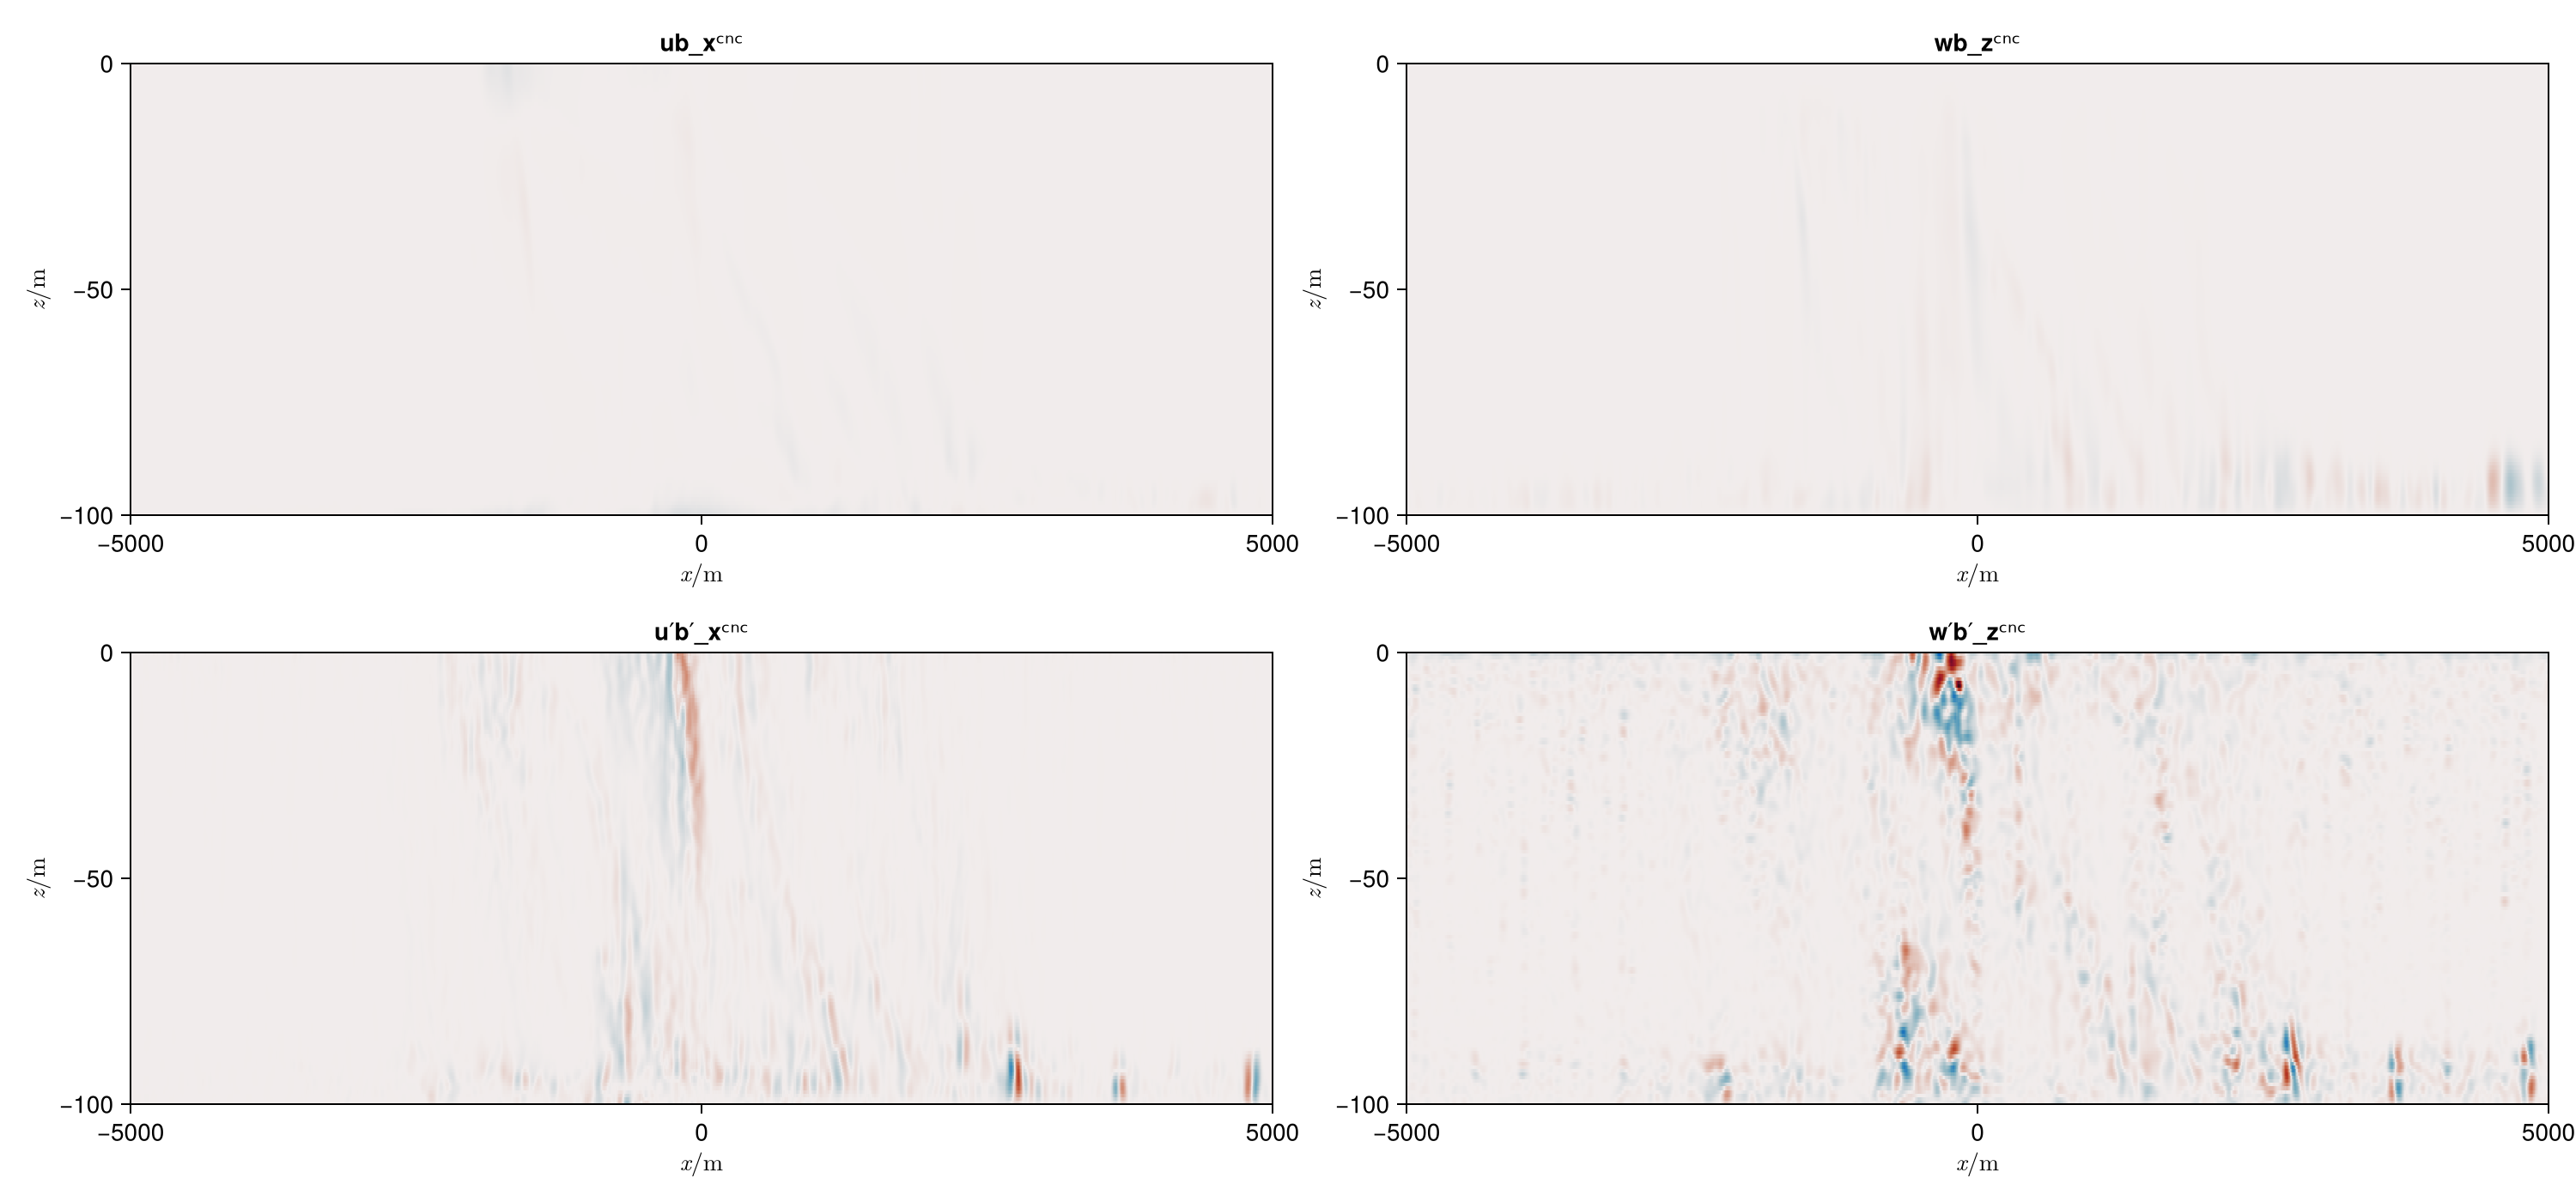

In [106]:
b_balance_fields = get_fields(b_balance_names, "$foldername/balance.jld2", iterations[end]);
fig = Figure(; size=(1500, 700))
axis_kwargs = (; xlabel=L"x/\text{m}", ylabel=L"z/\text{m}", limits=(xsᶠᵃᵃ[4], xsᶠᵃᵃ[end-3], zsᵃᵃᶠ[4], zsᵃᵃᶠ[end-3]))

u_b_max = maximum(map(a->maximum(abs.(a)), b_balance_fields)) / 1
ht_kwargs = (; colormap=:balance, colorrange=(-u_b_max, u_b_max))
ax = Axis(fig[1, 1]; title=b_balance_names[1], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, b_balance_fields[1]; ht_kwargs...)

ax = Axis(fig[1, 2]; title=b_balance_names[2], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, b_balance_fields[2]; ht_kwargs...)

ax = Axis(fig[2, 1]; title=b_balance_names[3], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, b_balance_fields[3]; ht_kwargs...)

ax = Axis(fig[2, 2]; title=b_balance_names[4], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, b_balance_fields[4]; ht_kwargs...)
fig

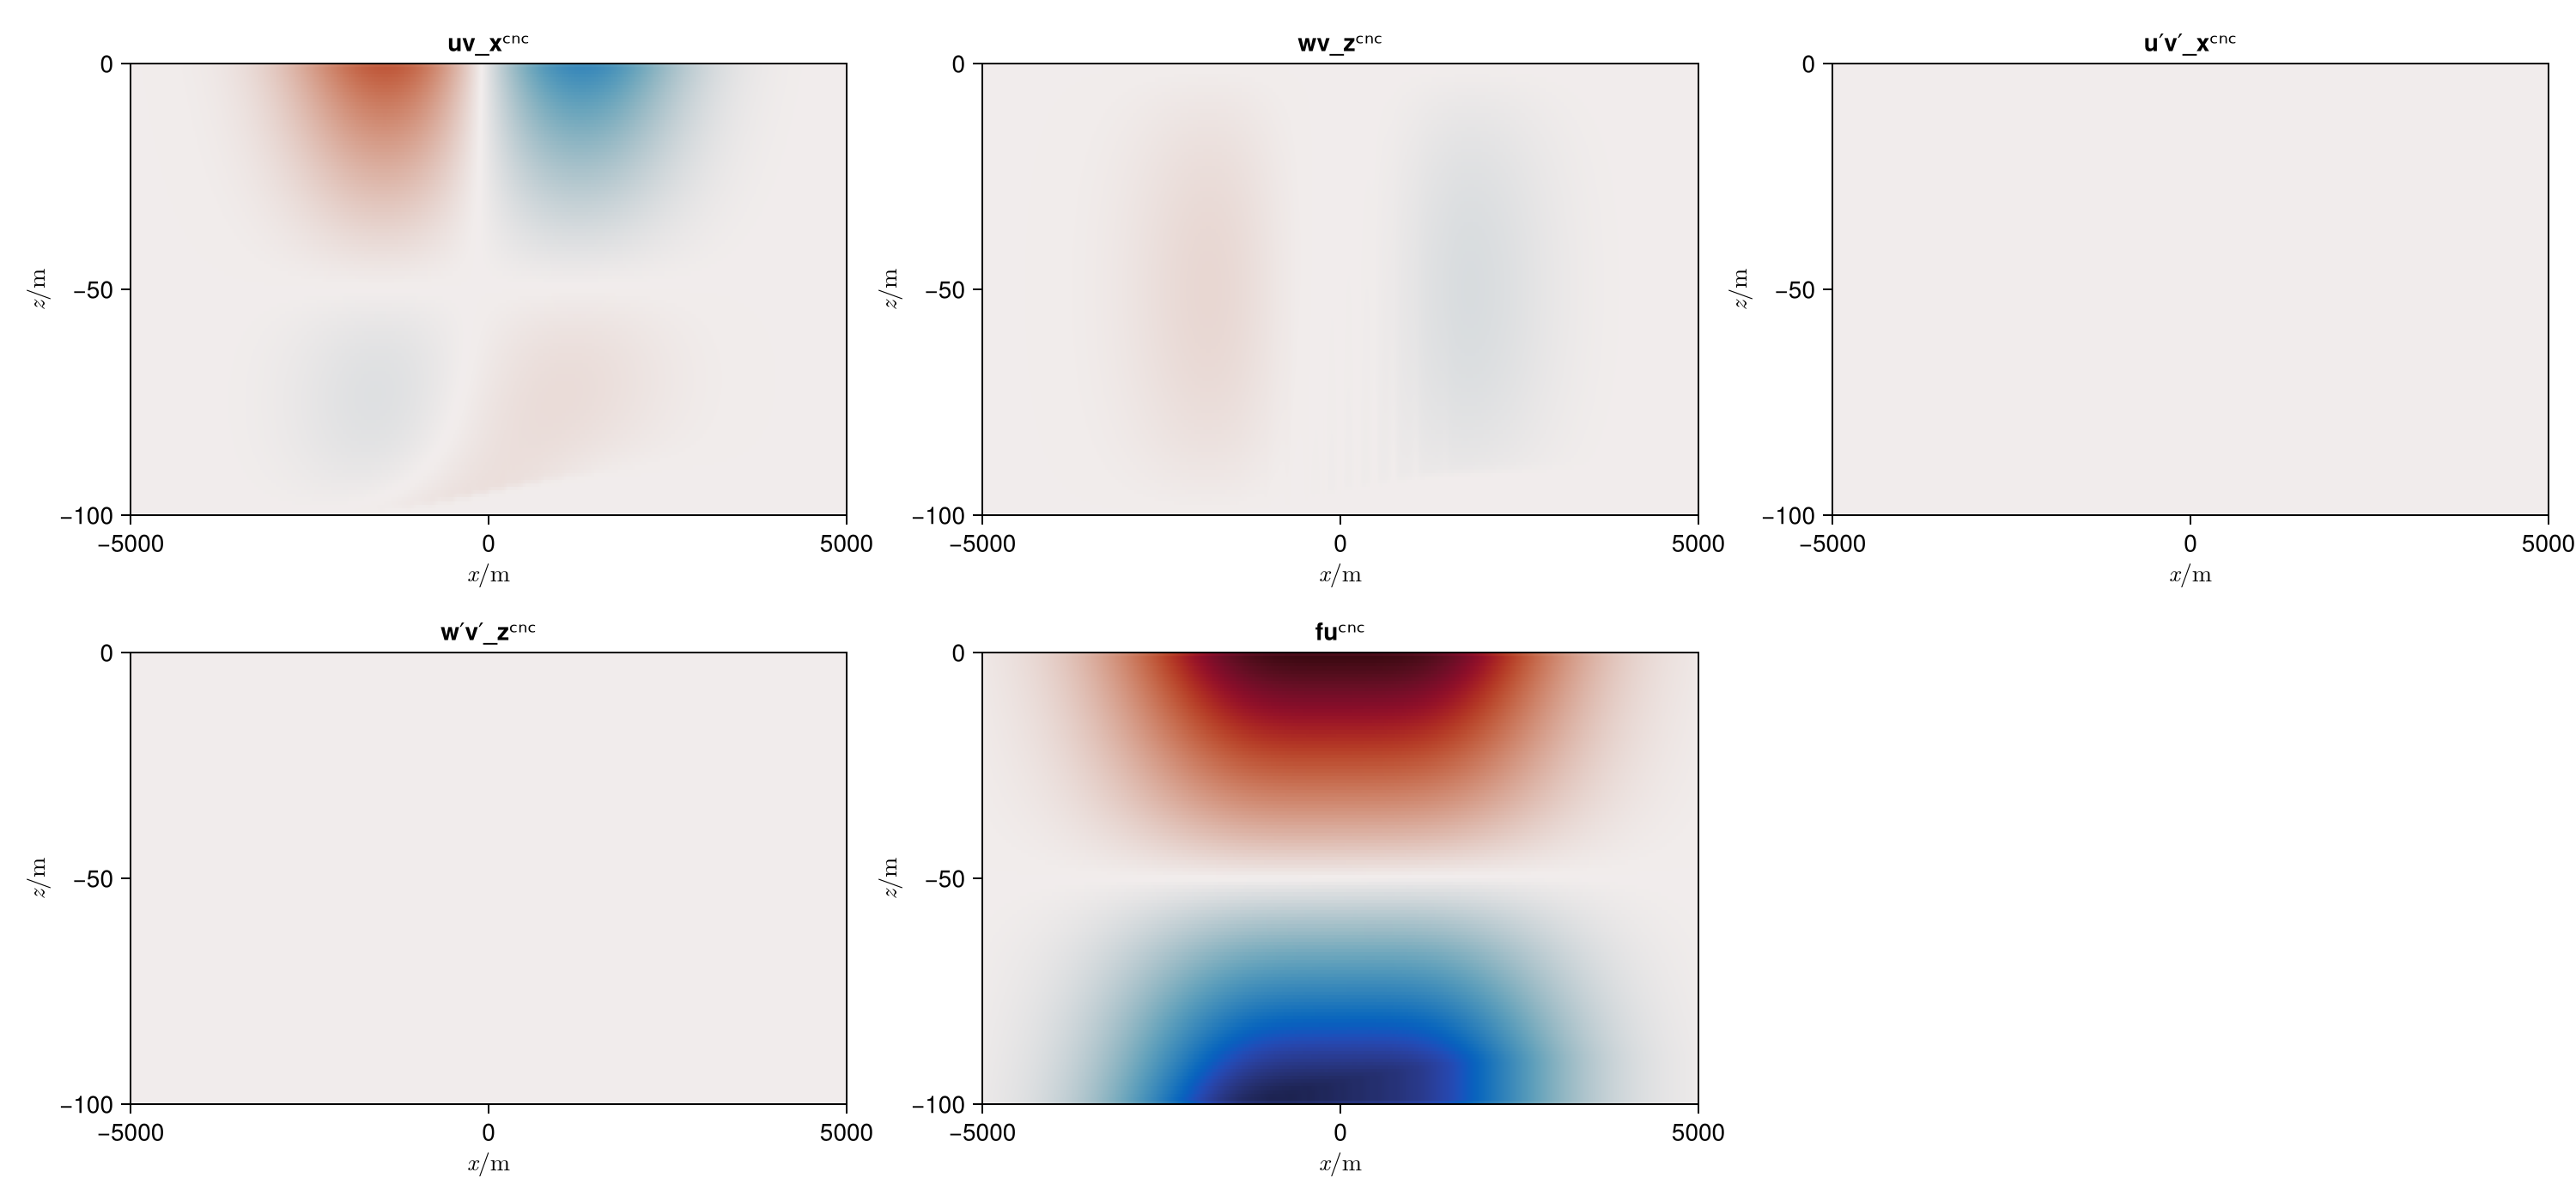

In [137]:
v_balance_fields = get_fields(v_balance_names, "$foldername/balance.jld2", iterations[2]);
fig = Figure(; size=(1500, 700))
axis_kwargs = (; xlabel=L"x/\text{m}", ylabel=L"z/\text{m}", limits=(xsᶠᵃᵃ[4], xsᶠᵃᵃ[end-3], zsᵃᵃᶠ[4], zsᵃᵃᶠ[end-3]))

u_v_max = maximum(map(a->maximum(abs.(a)), v_balance_fields))
ht_kwargs = (; colormap=:balance, colorrange=(-u_v_max, u_v_max))
ax = Axis(fig[1, 1]; title=v_balance_names[1], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, v_balance_fields[1]; ht_kwargs...)

ax = Axis(fig[1, 2]; title=v_balance_names[2], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, v_balance_fields[2]; ht_kwargs...)

ax = Axis(fig[1, 3]; title=v_balance_names[3], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, v_balance_fields[3]; ht_kwargs...)

ax = Axis(fig[2, 1]; title=v_balance_names[4], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, v_balance_fields[4]; ht_kwargs...)

ax = Axis(fig[2, 2]; title=v_balance_names[5], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶜ, v_balance_fields[5]; ht_kwargs...)
fig

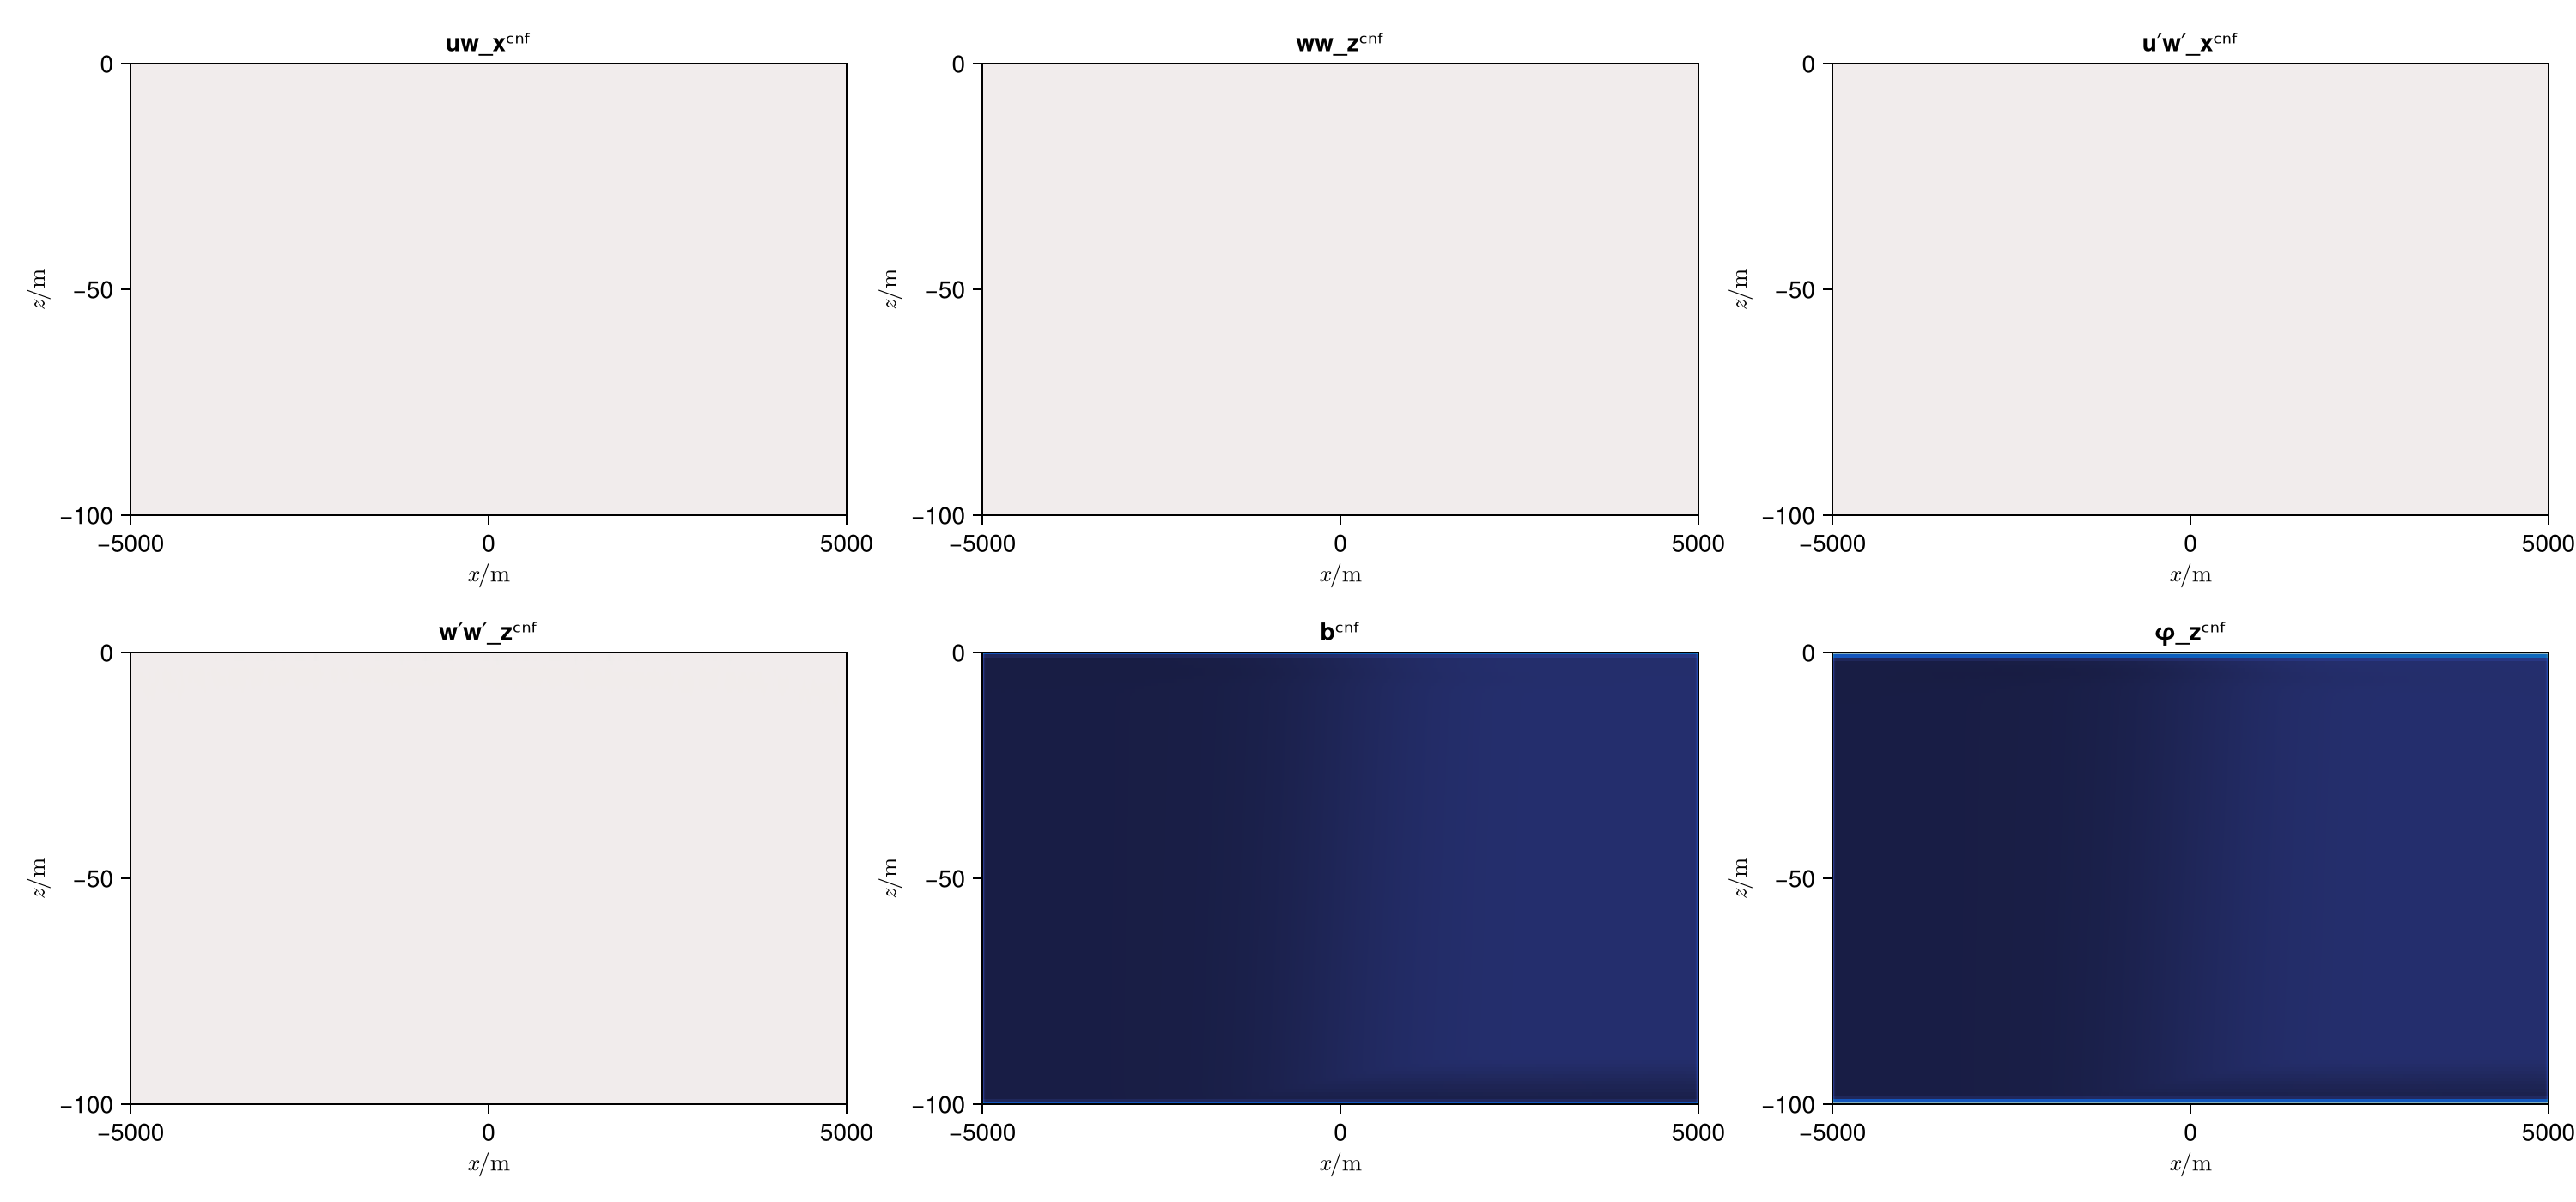

In [139]:
w_balance_fields = get_fields(w_balance_names, "$foldername/balance.jld2", iterations[10]);
fig = Figure(; size=(1500, 700))
axis_kwargs = (; xlabel=L"x/\text{m}", ylabel=L"z/\text{m}", limits=(xsᶠᵃᵃ[4], xsᶠᵃᵃ[end-3], zsᵃᵃᶠ[4], zsᵃᵃᶠ[end-3]))

w_b_max = maximum(map(a->maximum(abs.(a)), w_balance_fields)) / 1
ht_kwargs = (; colormap=:balance, colorrange=(-w_b_max, w_b_max))
ax = Axis(fig[1, 1]; title=w_balance_names[1], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶠ, w_balance_fields[1]; ht_kwargs...)

ax = Axis(fig[1, 2]; title=w_balance_names[2], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶠ, w_balance_fields[2]; ht_kwargs...)

ax = Axis(fig[1, 3]; title=w_balance_names[3], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶠ, w_balance_fields[3]; ht_kwargs...)

ax = Axis(fig[2, 1]; title=w_balance_names[4], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶠ, w_balance_fields[4]; ht_kwargs...)

ax = Axis(fig[2, 2]; title=w_balance_names[5], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶠ, w_balance_fields[5]; ht_kwargs...)

ax = Axis(fig[2, 3]; title=w_balance_names[6], axis_kwargs...)
heatmap!(ax, xsᶜᵃᵃ, zsᵃᵃᶠ, w_balance_fields[6]; ht_kwargs...)
fig

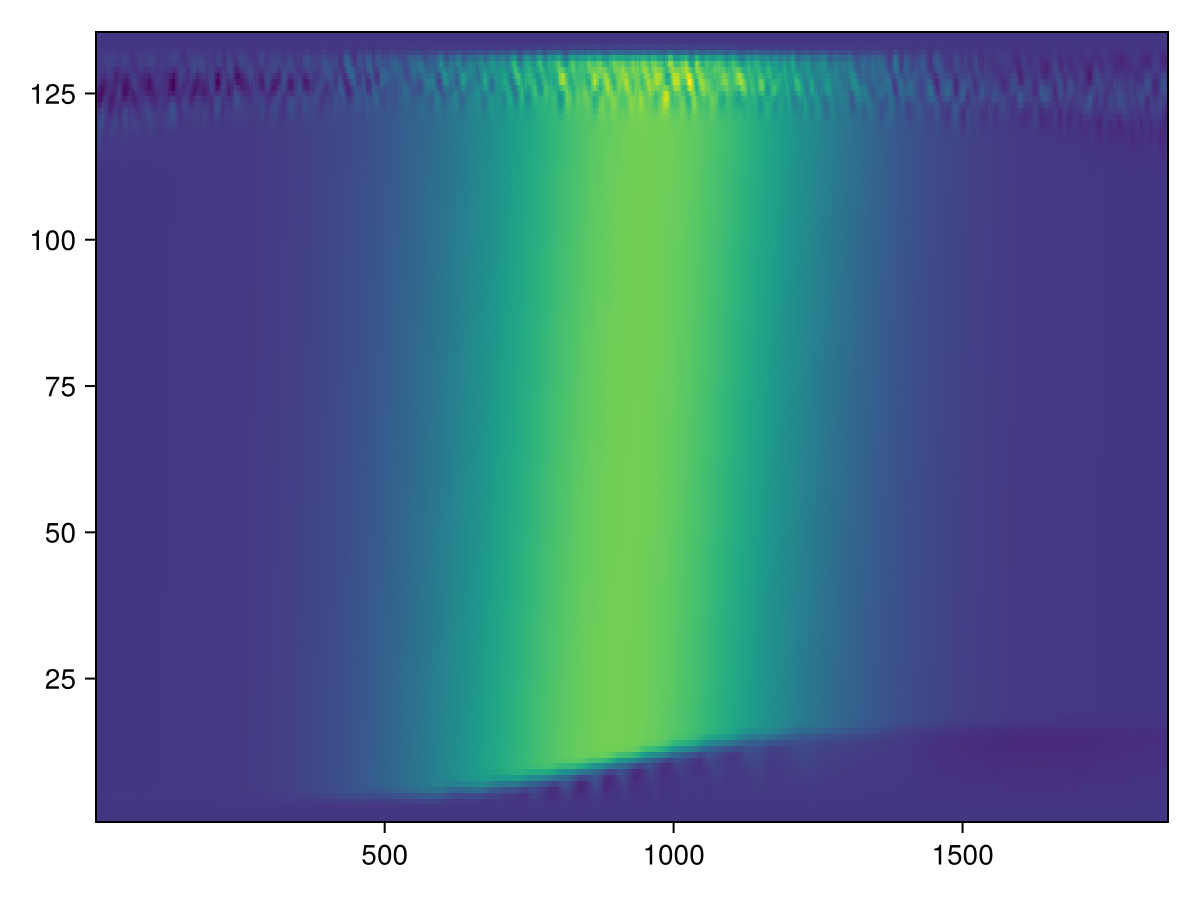

In [145]:
heatmap(diff(w_balance_fields[6][100:end-99, :]; dims=1))